# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Dinda Maulidiyah
- **Email:** dindamldyh@gmail.com
- **ID Dicoding:** Dinda Maulidiyah

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 -> Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda (cnt) dalam periode 2011–2012, dan apakah diperlukan strategi operasional berbeda saat cuaca buruk?
- Pertanyaan 2 -> Apakah terdapat perbedaan pola penggunaan antara pengguna casual dan registered selama weekday dan weekend pada periode 2011–2012?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
#Dataset Loading 'Day'
day_df = pd.read_csv('./data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#Dataset Loading 'Hour'
hour_df = pd.read_csv('./data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight Dataset Day:**
- Dataset harian terdiri dari variabel waktu (tanggal, musim, bulan, weekday), kondisi lingkungan (cuaca, suhu, kelembapan, kecepatan angin), serta jumlah penyewaan sepeda.

- Variabel cnt merepresentasikan total penyewaan sepeda per hari dan secara struktur merupakan agregasi dari casual dan registered.

- Variabel suhu (temp, atemp), kelembapan (hum), dan kecepatan angin (windspeed) telah dinormalisasi dalam rentang 0–1, sehingga memerlukan interpretasi relatif, bukan absolut.

- Dataset ini memungkinkan analisis pola musiman dan pengaruh faktor lingkungan terhadap total penyewaan sepeda.

**Insight Dataset Hour:**
- Dataset per jam memiliki struktur yang serupa dengan dataset harian, namun ditambahkan variabel hr yang memungkinkan analisis pola permintaan secara lebih granular berdasarkan waktu dalam sehari.

- Nilai cnt pada dataset ini merepresentasikan total penyewaan sepeda per jam, sehingga lebih detail untuk mengidentifikasi periode jam sibuk.

- Dataset ini sangat relevan untuk menjawab pertanyaan terkait peak hour dan perbedaan pola penggunaan antara hari kerja dan akhir pekan.

- Kombinasi dataset harian dan per jam memungkinkan analisis permintaan dari dua perspektif: makro (musiman) dan mikro (jam operasional).

### Assessing Data

In [5]:
# Data Understanding 'Day'
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplicated: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplicated:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [9]:
day_df.describe(include = "all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [10]:
# Data Understanding 'Hour'
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
print("Jumlah duplicated: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplicated:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [14]:
hour_df.describe(include = "all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Terdapat beberapa kolom kategorikal yang masih berbentuk angka (season, weathersit, weekday).
- Tidak semua variabel dalam bentuk yang mudah dibaca sehingga perlu transformasi.
- Struktur data sudah cukup rapi dan siap untuk analisis setelah validasi.

### Cleaning Data

In [15]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

**Insight:**
- Tidak ditemukan missing value dan data duplicated.
- Format tanggal berhasil dikonversi ke tipe datetime.
- Data siap dianalisis tanpa anomali besar yang mengganggu hasil.

## Exploratory Data Analysis (EDA)

### Explore ...

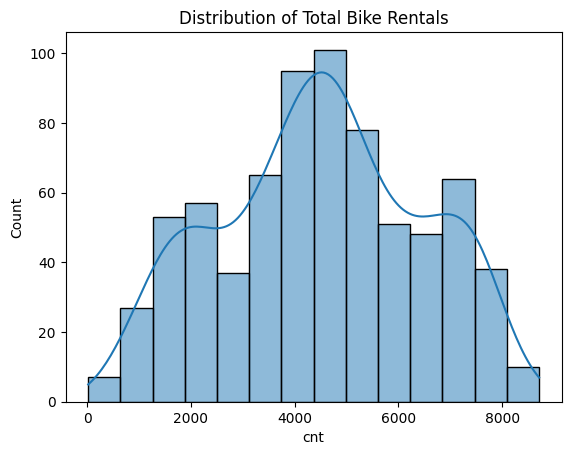

In [ ]:
# Memahami distribusi jumlah penyewaan
sns.histplot(day_df['cnt'], kde=True)
plt.title("Distribution of Total Bike Rentals")
plt.show()

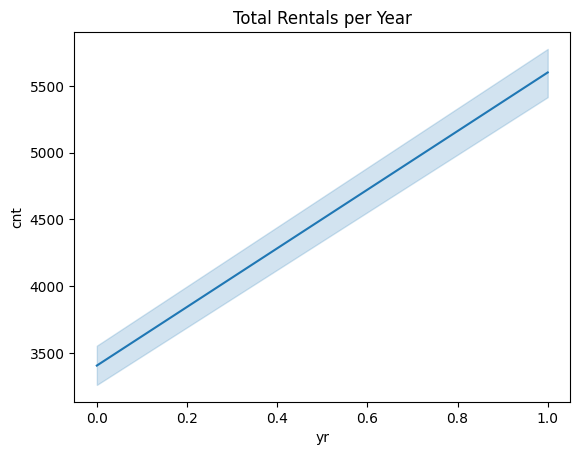

In [ ]:
# Tren Tahunan
sns.lineplot(x='yr', y='cnt', data=day_df)
plt.title("Total Rentals per Year")
plt.show()

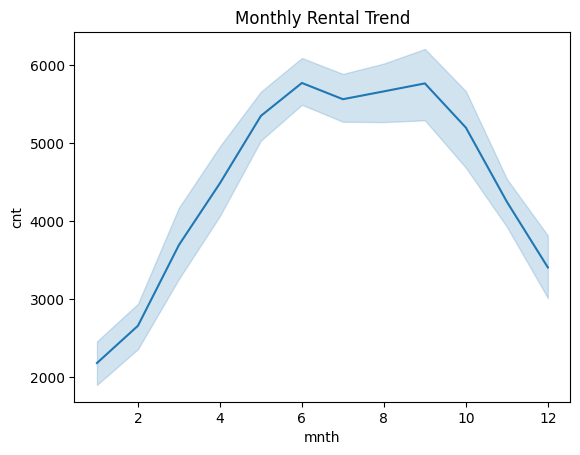

In [20]:
# Tren Bulanan
sns.lineplot(x='mnth', y='cnt', data=day_df)
plt.title("Monthly Rental Trend")
plt.show()

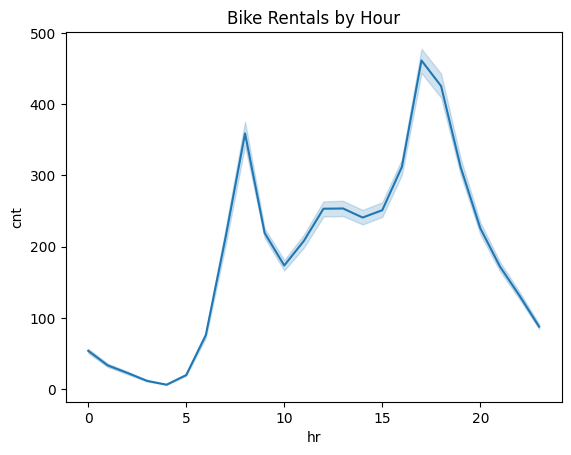

In [ ]:
# peak hour 
sns.lineplot(x='hr', y='cnt', data=hour_df)
plt.title("Bike Rentals by Hour")
plt.show()

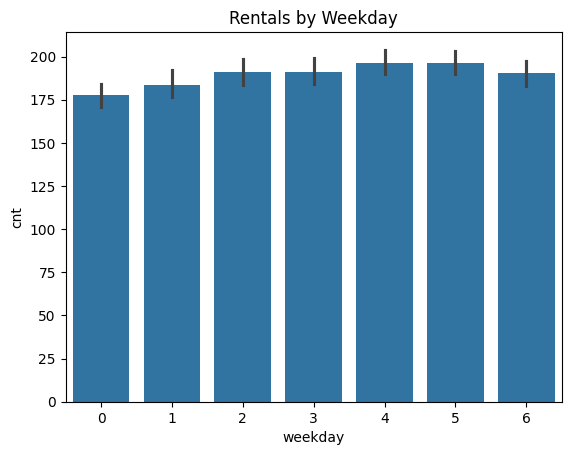

In [23]:
# Weekday vs Weekend
sns.barplot(x='weekday', y='cnt', data=hour_df)
plt.title("Rentals by Weekday")
plt.show()

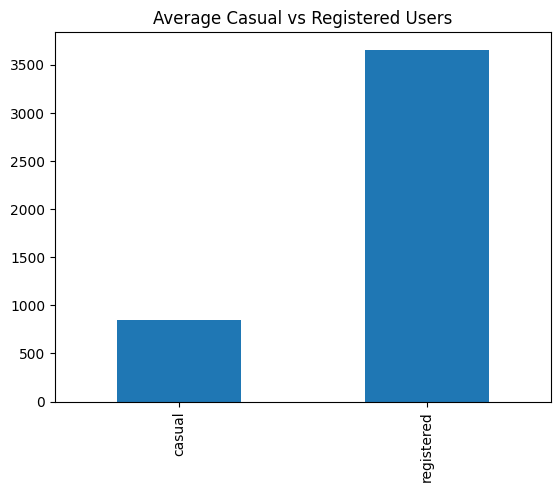

In [24]:
#Casual vs Registered
day_df[['casual','registered']].mean().plot(kind='bar')
plt.title("Average Casual vs Registered Users")
plt.show()

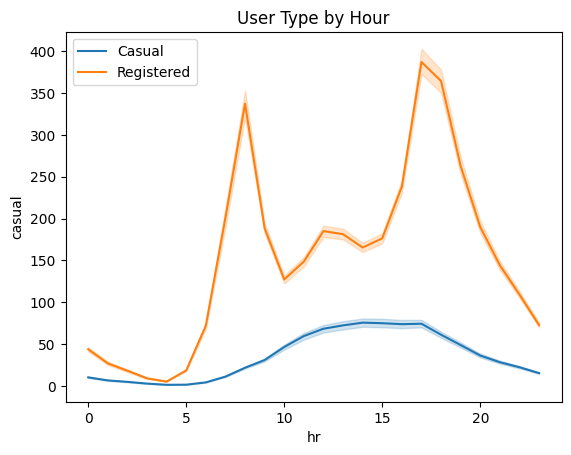

In [25]:
# berdasarkan jam
sns.lineplot(x='hr', y='casual', data=hour_df, label='Casual')
sns.lineplot(x='hr', y='registered', data=hour_df, label='Registered')
plt.title("User Type by Hour")
plt.legend()
plt.show()

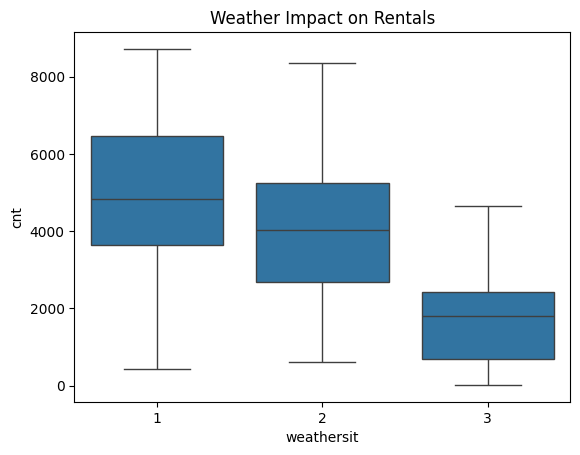

In [26]:
# Cuaca vs Penyewaan
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title("Weather Impact on Rentals")
plt.show()

**Insight:**
- Terjadi peningkatan jumlah penyewaan dari tahun 2011 ke 2012.
- Penyewaan tertinggi terjadi pada jam sibuk (sekitar pagi dan sore).
- Pengguna registered lebih dominan dibanding casual.
- Cuaca dan suhu berpengaruh terhadap jumlah penyewaan.
- Weekend menunjukkan pola berbeda dibanding weekday.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

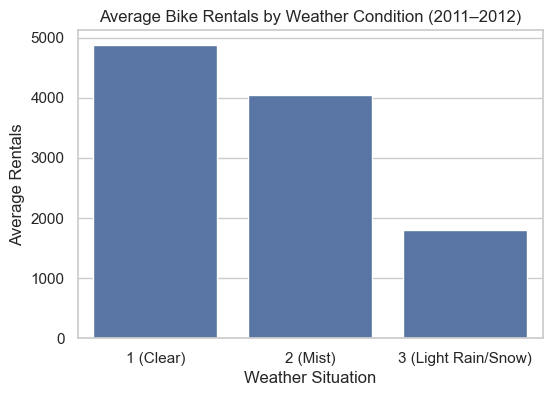

In [34]:
plt.figure(figsize=(6,4))

weather_avg = day_df.groupby('weathersit')['cnt'].mean().reset_index()

sns.barplot(x='weathersit', y='cnt', data=weather_avg)

plt.title('Average Bike Rentals by Weather Condition (2011–2012)')
plt.xlabel('Weather Situation')
plt.ylabel('Average Rentals')

# Tambahkan keterangan di sumbu x
plt.xticks(
    ticks=[0,1,2], 
    labels=[
        '1 (Clear)',
        '2 (Mist)',
        '3 (Light Rain/Snow)'
    ]
)

plt.show()

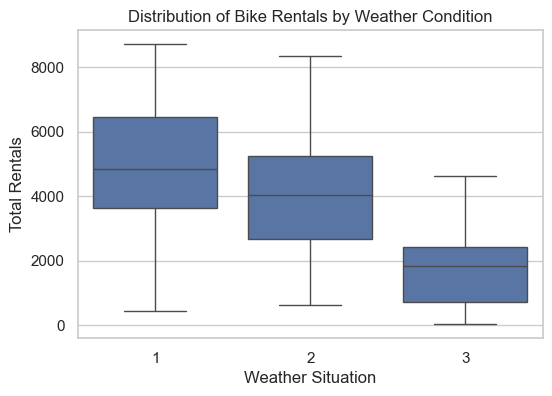

In [ ]:
# Boxplot Distribusi Penyewaan per Cuaca
plt.figure(figsize=(6,4))

sns.boxplot(x='weathersit', y='cnt', data=day_df)

plt.title('Distribution of Bike Rentals by Weather Condition')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals')
plt.show()

### Pertanyaan 2:

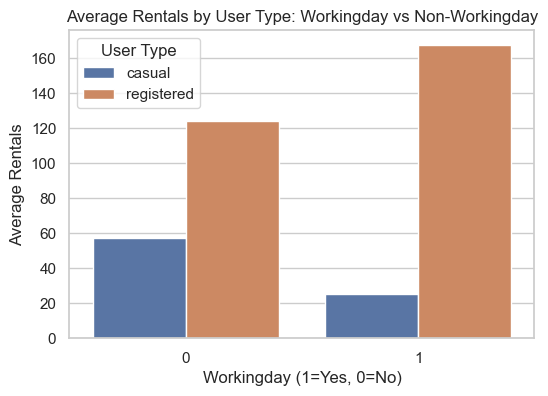

In [ ]:
# Rata-rata Casual & Registered: Weekday vs Weekend
user_type = hour_df.groupby(['workingday'])[['casual','registered']].mean().reset_index()

user_type_melt = user_type.melt(id_vars='workingday', 
                                value_vars=['casual','registered'],
                                var_name='user_type',
                                value_name='average_rentals')

plt.figure(figsize=(6,4))

sns.barplot(x='workingday', y='average_rentals', hue='user_type', data=user_type_melt)

plt.title('Average Rentals by User Type: Workingday vs Non-Workingday')
plt.xlabel('Workingday (1=Yes, 0=No)')
plt.ylabel('Average Rentals')
plt.legend(title='User Type')
plt.show()

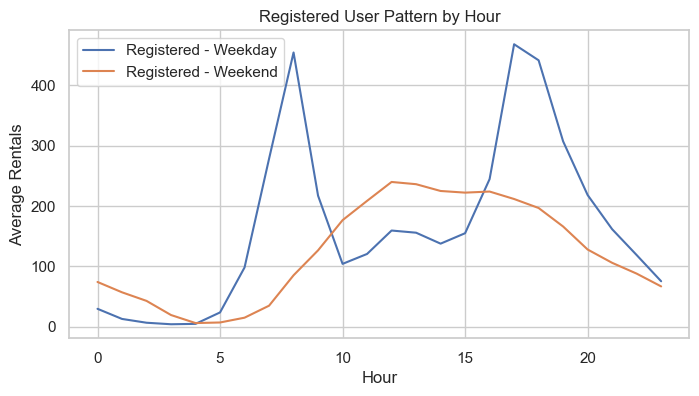

In [33]:
# Pola Per Jam: Weekday vs Weekend
plt.figure(figsize=(8,4))

weekday_data = hour_df[hour_df['workingday']==1].groupby('hr')['registered'].mean()
weekend_data = hour_df[hour_df['workingday']==0].groupby('hr')['registered'].mean()

plt.plot(weekday_data, label='Registered - Weekday')
plt.plot(weekend_data, label='Registered - Weekend')

plt.title('Registered User Pattern by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rentals')
plt.legend()
plt.show()

**Insight:**
- Pertanyaan 1 : Cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan. Cuaca buruk menyebabkan penurunan permintaan, sehingga strategi operasional perlu disesuaikan berdasarkan kondisi cuaca.
- Terdapat perbedaan pola yang jelas antara casual dan registered. Registered dominan pada weekday dengan pola commuting, sedangkan casual lebih aktif pada weekend dengan pola rekreasional.

## Analisis Lanjutan (Opsional)

In [35]:
rfm_df = day_df.copy()

# Buat kolom tanggal terakhir
latest_date = rfm_df['dteday'].max()

rfm_summary = rfm_df.groupby('yr').agg({
    'dteday': lambda x: (latest_date - x.max()).days,  # Recency
    'cnt': 'count',                                    # Frequency
    'cnt': 'sum'                                       # Monetary
}).reset_index()

rfm_summary.columns = ['Year','Recency','Monetary']

In [36]:
# Kategori berdasarkan quartil
day_df['demand_level'] = pd.qcut(
    day_df['cnt'],
    q=3,
    labels=['Low','Medium','High']
)

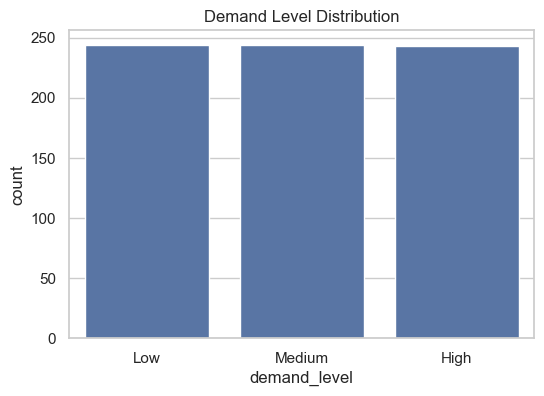

In [37]:
# visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='demand_level', data=day_df)
plt.title('Demand Level Distribution')
plt.show()

In [38]:
# binning 
day_df['temp_category'] = pd.cut(
    day_df['temp'],
    bins=3,
    labels=['Cold','Mild','Hot']
)

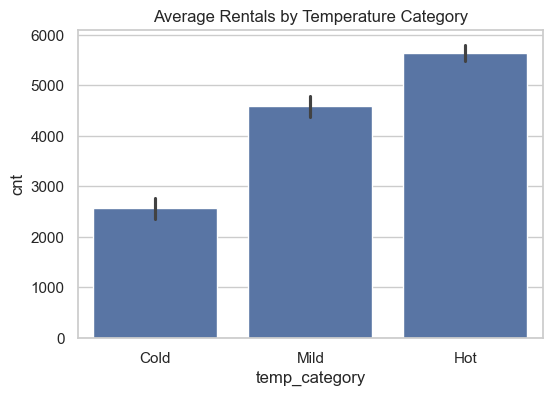

In [39]:
plt.figure(figsize=(6,4))
sns.barplot(x='temp_category', y='cnt', data=day_df)
plt.title('Average Rentals by Temperature Category')
plt.show()

## Conclusion

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda (cnt) dalam periode 2011–2012, dan apakah diperlukan strategi operasional berbeda saat cuaca buruk? <br>
Kondisi cuaca berpengaruh signifikan terhadap jumlah penyewaan sepeda.Semakin buruk cuaca, semakin rendah jumlah penyewaan.<br>
Strategi operasional adaptif berbasis cuaca sangat disarankan untuk efisiensi biaya dan optimalisasi armada
- Apakah terdapat perbedaan pola penggunaan antara pengguna casual dan registered selama weekday dan weekend pada periode 2011–2012?<br>
Terdapat perbedaan pola penggunaan yang jelas antara casual dan registered.
<br>Registered dominan saat weekday → orientasi transportasi rutin
<br>Casual dominan saat weekend → orientasi rekreasi <br>
Artinya, demand tidak homogen dan perlu strategi segmentasi yang berbeda.